## 💻 UnpackAI DL201 Bootcamp - Week 1 - Skills: Computer Vision

### 📕 Learning Objectives

* Conceptualize the concept of Tensors in the context of machine learning and their benefits.
* Identifiy the differences of important data structures such as Python lists, Numpy arrays and Pandas DataFrames.

### 📖 Concepts map



In [1]:
#!pip install unpackai -qq
!git clone https://github.com/unpackAI/DL201.git

# imports
from pathlib import Path
import pandas as pd
import numpy as np 



## Config Variables |

#Kaggle config

DATA_DIR = Path('/kaggle/working/DL201/data') #uncomment for kaggle
IMAGE_DIR = Path('/kaggle/working/DL201/img') #Uncomment for Kaggle

#Local Config

#DATA_DIR = Path.home()/'Datasets'/'unpackAI'/'DL201'/'data'
#IMAGE_DIR = Path('../img') #uncomment for local machine




### Step 1: Loading the data
<hr style="border:4px solid gray"> </hr>

As is always, the question becomes, how do we access our data.

How is it stored?

Many computer vision data sets are organized in two ways.

* As individual files stored in a file tree

* With Metadata in a JSON or CSV file containing the file paths and the labels


### Key Concept: File Paths

In addition to indexing, another model for storing information is in what is called a file tree. The root of the file tree is the base directory, which on windows is usually 'C:\\' or in linux is just / 

From this, more files and directories can be organized and found along these trees. This method is useful for organizing files rather than data points because it allows us to keep everything together in relevant baskets.

### How Large is the dataset?

Before downloading the data, it is a good idea to know how large the dataset is because this will affect how you move forward? If it is very large, you may need to consider how it will be stored.

You may need to select a sample out of the dataset to work with rather than work with the whole set. This will speed up exploring the data because you won't constantly be waiting for the computer to process the data.

This information is usually found online.

### How are the images stored?

### Case 1: In a Zip File

#### Extracting Zip Files
<hr style="border:1px solid gray"> </hr>

Zip files are incredibly common in many areas.

For datasets, they serve two primary purposes

1. This format bundles together many files into one and makes it easier and faster to send it over the internet. Network protocols are similar to the mail. It's much less complicated to send a shipping container rather than do paperwork and handling of thousands of individual boxes.

2. Compression. The other problem is bandwidth. Zip files, along with other formats, can make files smaller which is beneficial because they take up less space on the hard drive. More importantly, this means that we can download the dataset faster. 



##### Step 1: Find the exact file path

In [18]:
# Setting the file path using pathlib

emotionsImagesZipPath = DATA_DIR/'CV'/'Emotions_Images_Sample.zip'



##### Step 2: Unzip the files

In this code, we are using a library called shutil
Shutil is short for shell utility.

This allows python to make commands in the shell like we learned earlier.

In this case, we are telling it to unzip a file at location X and put it into location Y

In [19]:
# Unzipping Zip files in Python
import os
from shutil import unpack_archive

unpack_archive(emotionsImagesZipPath,DATA_DIR)


##### Step 3: Check the file path



Now that we extracted the data, we now need to make sure that we know where our data is, and check up on it before proceeding to the next level.

Check the output of the next command and see what it is doing.

Now that we have unzipped our dataset, we can proceed to see 
what is inside of it. We should look for our labels first

Now that we have unzipped our dataset, we can proceed to see 
what is inside of it. We should look for our labels first

In [2]:
EMOTIONS_IMAGES_DIR = DATA_DIR/'Emotions_Images_Sample'

In [3]:
labels = os.listdir(EMOTIONS_IMAGES_DIR)

Here, the labels are conveniently stored as directory names, so they are easy to extract.

In [4]:
print(labels)

['Fear', 'Angry', 'Neutral', 'Surprise', 'Happy', 'Sad', 'Disgust']


In [5]:
print(f'total number of labels: {len(labels)}')

total number of labels: 7


### How are the Classes Structured?

There are two common places to extract the labels from. The first is from the directory structure.

The second is from the file paths themselves.

And the third is that it is located in a metadata file.



### Are the Images Stored in a File Tree?

If the files are stored in a directory structure, then the labels will be the names of the directories, and the file paths for each image will be inside of those directories. 

In [6]:
instancesPerClassDict = {}

filepathDictionary = {}

for label in os.listdir(EMOTIONS_IMAGES_DIR):
    
    # This gives us a label for each bit of code
    imagesDirectory = EMOTIONS_IMAGES_DIR/label
    
    # This code gives a list of all the images in the directory
    
    images = os.listdir(imagesDirectory)
    for fileName in images:
        
        imagePath = imagesDirectory/fileName # makes a longer path
        
        imageName = imagePath 
    
    instancesPerClassDict[label] = len(images)
    
for key, value in instancesPerClassDict.items():
    print(f'Class: ({key}) contains {value} instances')


Class: (Fear) contains 51 instances
Class: (Angry) contains 51 instances
Class: (Neutral) contains 51 instances
Class: (Surprise) contains 101 instances
Class: (Happy) contains 51 instances
Class: (Sad) contains 51 instances
Class: (Disgust) contains 51 instances


Now, we have our data in a format that it can be put into a fastAI model to give us more information.

### Are the Labels and File Paths Stored in a Metadata File?

In some cases, the files may be located on a cloud server, or put together into one large directory. This means that the information is not organized with a file tree, but rather in metadata.

This metadata can come as a CSV or a JSON File.


Type 3: This is the google landmarks image dataset, it contains lots of information on different photos that users have uploaded along with different kinds of metadata.

However, the  dataset is quite large, so it makes more sense to download the paths individually

These  metadata files contain both the labels and the file paths that we need

Step 1, identifying the x and the y 

The features (x) in this case are the images Labels (y) in this case are the  landmark IDs

In [10]:
# Type of computer vision datasets 
import os 

googleLandmarksPath = DATA_DIR/'CV'/'landmarks'


In [11]:


# This snippet can be useful for handling many csv files

for dirname, _, filenames in os.walk(googleLandmarksPath):
    for filename in filenames:  # loops through all the files in the directories
        print(filename) # Gives a file name, without the complete file path
        filepath = os.path.join(dirname,filename) # Completes the file path
        filename = filename.split('.')[0] # Removes the file extension for naming
        exec(f"{filename} = pd.read_csv('{filepath}')")


recognition_solution.csv
train.csv
retrieval_solution.csv
boxes_split2.csv
index.csv
test.csv
landmarksample.csv
boxes_split1.csv


### Metadata EDA

We want to know  the shape, because as we learned in the last lesson, shape is very important.

If we check the ratios of the shape and we find relationships, we can confirm that we have what we need



Again, we can look at the shape and the size of the datasets. In this, it might be useful to see any relationships between them

In [21]:
# Train
train.drop(['Unnamed: 0'],axis=1,inplace=True)
print(train.shape)
train.head(3)

(2000, 3)


,id,url,landmark_id
0,638a7921e893de63,http://lh6.ggpht.com/-okvU3kjsKWQ/TjnHZCjgLdI/...,3918
1,ec108f2c67d28082,https://lh4.googleusercontent.com/-ghGLWnz_5Nw...,4786
2,8b8d9329e3fccd0a,https://lh4.googleusercontent.com/-49VHsrW3voo...,6090


In this dataset, the label is the landmarkID

The file location is a little more tricky because it is stored on google's servers, and needs to be downloaded. 

In [29]:
landmarkLabels = train['landmark_id']
landmarkURLs = train['url']

Although these are different, the principles remain the same that we need to know what the image is, and where the image is stored. The label and the file path/url will hold this information. Once we have this information, we can then proceed to perform EDA.

https://www.kaggle.com/piyushrg/computer-vision-av-fastai/notebook

## Coarse Checks
<hr style="border:4px solid gray"> </hr>


In order to leverage a fastAI model, the two key pieces of information that we will need to fit the data into the model are the labels, and how the images are stored. 

Once we can do that, we can go head and train a preliminary model to give more quantified information on how to improve the model.

In [32]:
# Imports
!pip install -Uqq fastbook[full]


import fastbook
fastbook.setup_book()

#hide
from fastbook import *

from fastbook import *
from fastai.vision.widgets import *



### Loading the Data

If our data is stored in google colab we can use the following code as a template to  upload it.

The goal here is to get the file paths or our x variable (which is the images) along with the y variable which is the label contained in the path

In [33]:
CV_DATASET_DIR = DATA_DIR/'Emotions_Images_Sample'


### Dataloader

Once we have our images in a path, we can use a dataloader to preprocess and transform the data automatically for us using FastAI

In [38]:
class DataLoaders(GetAttr):
  def __init__(self, *loaders): self.loaders = loaders
  def __getitem__(self, i): return self.loaders[i]
  train,valid = add_props(lambda i, self: self[i])

In [40]:
emotions = DataBlock (
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=99),
    get_y=parent_label,
    item_tfms=Resize(225,225)
    )

In [41]:
emotions = emotions.new(
    item_tfms=RandomResizedCrop(28, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [42]:
dls = emotions.dataloaders(CV_DATASET_DIR)

### Training the Model

In [44]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)


In [45]:


learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.183473,3.416628,0.851852,00:01


epoch,train_loss,valid_loss,error_rate,time
0,2.980531,2.600915,0.864198,00:01
1,2.954985,2.222032,0.753086,00:01
2,2.955656,2.193115,0.728395,00:01
3,2.922348,2.174412,0.740741,00:01
4,2.854110,2.236914,0.802469,00:01


## Part 3: Interpreting the Results

In [46]:
interp = ClassificationInterpretation.from_learner(learn)

### What is the Accuracy of the Model?

In [47]:
interp.print_classification_report()

              precision    recall  f1-score   support

       Angry       0.20      0.12      0.15        16
     Disgust       0.40      0.25      0.31        16
        Fear       0.18      0.29      0.22         7
       Happy       0.20      0.22      0.21         9
     Neutral       0.07      0.10      0.08        10
         Sad       0.07      0.33      0.12         3
    Surprise       0.36      0.20      0.26        20

    accuracy                           0.20        81
   macro avg       0.21      0.22      0.19        81
weighted avg       0.26      0.20      0.21        81



### What Does the Confusion Matrix Look Like?

interp.confusion

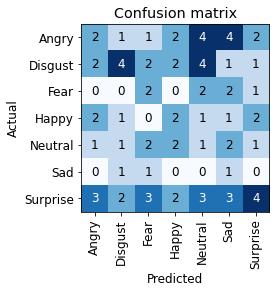

In [54]:
interp.plot_confusion_matrix()

### Do you see any clear patterns in the confusion matrix?

#### Can you think of reasons why it got confused?

### What are the Most Confused Images?

#### Should any of these Images be removed from the Dataset? 

#### Are they Clustered in One or a Few Classes?

### Are they Distributed across many Classes?

### Can you find any poor quality images?

### Can Filters be Applied to Improve the Quality of the Images?

### Are any Features Blocked or Occluded in these images?

### Can any Features be Highlighted to Improve the Model's Performance?

### Where Does this First Run Strengthen your Hypothesis?

### Have Any Other Weaknesses in the Model been Revealed? 

### Are There Any Major Class Inbalances that Affect Model Performance?

#### Can These be improved by Image Augmentation? 

### Can you collect more data in areas where your model is weak?

#### Can you Easily Find More Data by Reverse Image Searching the Most Confused Images?

### How Could Image Preprocessing Make Features More Apparent to the Model?